In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

H = 10.0       # Profundidad inicial [m]
M = 2.0        # Pendiente [m⁻¹]
L = 100.0      # Ancho del canal [m]
L_canal = 200  # Longitud del canal [m]
u0 = 1.0       # Velocidad uniforme en la entrada [m/s]
f = 0.1        # Parámetro de Coriolis [s⁻¹]

x = np.linspace(0, L_canal, 20)
y = np.linspace(-L/2, L/2, 15)
X, Y = np.meshgrid(x, y)


Recordamos que la expresión general de la velocidad para este ejercicio está dada por (tomé f en lugar de 1/2f): $$ u(y) = \frac{fM}{H} y + \frac{u_0 H}{H-M} $$

Sin embargo al ser el fondo función de la longitud de la cuenca: $$H(x) = {H} - {\frac{M}{L}{x}}$$

Podemos expresar u(x,y) de la siguiente forma:
$$u(x,y)=\frac{fM}{H} y + \frac{u_0 H}{H-\frac{M}{L}{x}} $$

(np.float64(0.0), np.float64(200.0), np.float64(-50.0), np.float64(50.0))

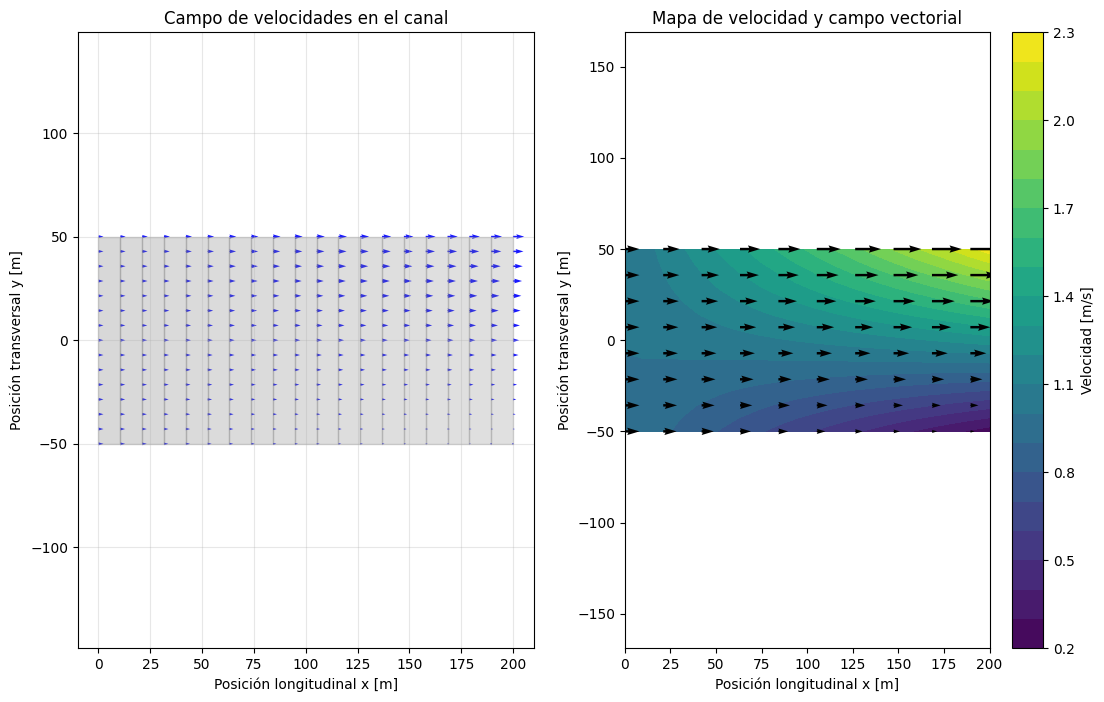

In [21]:
H_x = H - (M / L_canal) * x #expresión del fondo en función de la longitud del canal

#Calculamos la vorticidad y velocidad para cada punto
Z = np.zeros_like(X)
U = np.zeros_like(X)
V = np.zeros_like(X)  # Armamos vectores con 0s para depositar los valores de velocidad calculados

for i in range(len(x)):
    # Profundidad en la sección x de la cuenca
    H_actual = H_x[i]

    # Partimos de: (ζ + f)/H = constante = f/H (en la entrada donde ζ=0 y H=H)
    # Despejando ζ: ζ = f * (H_actual/H - 1)
    # Esto representa cuánta rotación relativa adquiere el fluido debido al cambio de profundidad
    zeta = f * (H_actual / H - 1)

    # Constante de integración (conservación de masa)
    C = (u0 * H) / H_actual

    # Perfil de velocidades en esta sección
    Z[:, i] = zeta
    U[:, i] = (-zeta * Y[:, i]) + C

#Dos formas de visualizar los campos de velocidad zonal:

#Cualitativa con vectores por cada sección del canal
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
# Quiver plot (cada 1 puntos para mejor visualización)
plt.quiver(X[::1, ::1], Y[::1, ::1], U[::1, ::1], V[::1, ::1],
           scale=20, scale_units='inches', color='blue', alpha=0.9)
plt.xlabel('Posición longitudinal x [m]')
plt.ylabel('Posición transversal y [m]')
plt.title('Campo de velocidades en el canal')
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Añadir fondo que muestre la profundidad
for i, h in enumerate(H_x[:-1]):
    alpha = h / H  # Transparencia proporcional a la profundidad
    plt.fill_between([x[i], x[i+1]], [-L/2, -L/2], [L/2, L/2],
                    alpha=alpha*0.3, color='gray')

# Con escala de colores para la velocidad
plt.subplot(1, 3, 2)
contour = plt.contourf(X, Y, U, 20, cmap='viridis')
plt.colorbar(contour, label='Velocidad [m/s]')
plt.quiver(X[::2, ::2], Y[::2, ::2], U[::2, ::2], V[::2, ::2],
           color='black', scale=25)
plt.xlabel('Posición longitudinal x [m]')
plt.ylabel('Posición transversal y [m]')
plt.title('Mapa de velocidad y campo vectorial')
plt.axis('equal')

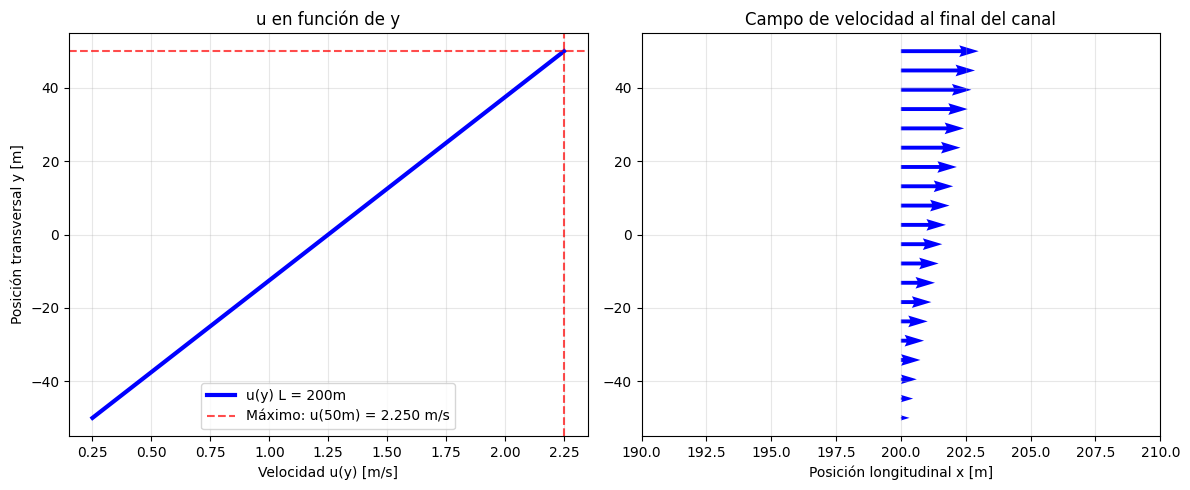

In [31]:
# Vemos lo que ocurre específicamente en el final del canal

H_salida = H - M

# Vorticidad relativa a la salida (constante)
zeta_salida = f * (H_salida / H - 1)

# Constante de integración (conservación de masa)
C_salida = (u0 * H) / H_salida

# Perfil de velocidades A LA SALIDA - solo función de y
def u_salida(y):
    return (-zeta_salida * y) + C_salida

y_values = np.linspace(-L/2, L/2, 100)
u_values = u_salida(y_values)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(u_values, y_values, 'b-', linewidth=3, label='u(y) L = 200m')
plt.xlabel('Velocidad u(y) [m/s]')
plt.ylabel('Posición transversal y [m]')
plt.title('u en función de y')
plt.grid(True, alpha=0.3)
plt.legend()

# Encontrar máximo
if zeta_salida > 0:
    y_max = -L/2
    u_max = u_salida(-L/2)
else:
    y_max = L/2
    u_max = u_salida(L/2)

plt.axvline(x=u_max, color='r', linestyle='--', alpha=0.7)
plt.axhline(y=y_max, color='r', linestyle='--', alpha=0.7,
           label=f'Máximo: u({y_max:.0f}m) = {u_max:.3f} m/s')
plt.legend()

# Visualización 2D para contexto
plt.subplot(1, 2, 2)
# Solo mostramos la sección de salida
y_2d = np.linspace(-L/2, L/2, 20)
x_2d = np.array([L_canal])  # Solo la salida
X, Y = np.meshgrid(x_2d, y_2d)
U = u_salida(Y)

plt.quiver(X, Y, U, np.zeros_like(U), scale=15, color='blue')
plt.xlabel('Posición longitudinal x [m]')
plt.title('Campo de velocidad al final del canal')
plt.xlim(L_canal-10, L_canal+10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()